# 【問題1】コンペティション内容の把握

1. 返済能力持たない人向けの貸金業者

2. 顧客の返済能力

3. 貸し倒れリスク低減

# 【問題2】データの概観の把握

In [1]:
import pandas as pd
train = pd.read_csv("home-credit-default-risk/application_train.csv")

pd.set_option("display.max_rows", 122)
pd.set_option("display.max_columns", 122)

In [2]:
test = pd.read_csv("home-credit-default-risk/application_test.csv")

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

* 欠損値の有無を見る

In [7]:
pd.set_option("display.max_rows", 122)

na_sum = train.isna().sum()
na_sum

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

* クラスの割合がわかるグラフを描く

In [8]:
import matplotlib.pyplot as  plt
import seaborn as sns

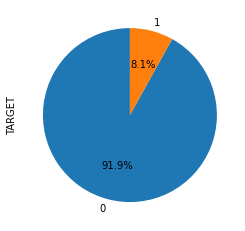

In [9]:
train.loc[:, "TARGET"].value_counts().plot(kind="pie", startangle=90, autopct="%1.1f%%")
plt.show()

In [10]:
train.loc[:, "TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# 【問題3】課題設定

* FLAG_DOCUMENT_2 ~ FLAG_DOCUMENT_21など、意味が曖昧で且つ似たような特徴量は削除したい。
* 欠損が多めな特徴量も削除したい。
* 特徴量の数が多い為、相関を把握しどの特徴量を見ていくかなど方向性を探りたい。

# 【問題4】データ探索

## 1. 不要な特徴量削除

### 1-1. FLAG_DOCUMENTの要不要を検証

* FLAG_DOCUMENTについて、Descriptionや出力を見ながら要不要を検討。

In [11]:
# 図表１：FLAG_DOCUMENTの内容確認

train.loc[:, "FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].head(100)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* descriptionの説明（ Did client provide document N）からは内容が不明。
* 出力の内容からもドキュメントの内容が不明瞭な為、解釈性に乏しく削除しても差し支えないと判断。

### 1-2. FLAG_DOCUMENT削除

In [12]:
train.drop(train.loc[:, "FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"], axis=1, inplace=True)

In [13]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,N

## 2. 欠損処理

### 2-1. 欠損値の概観

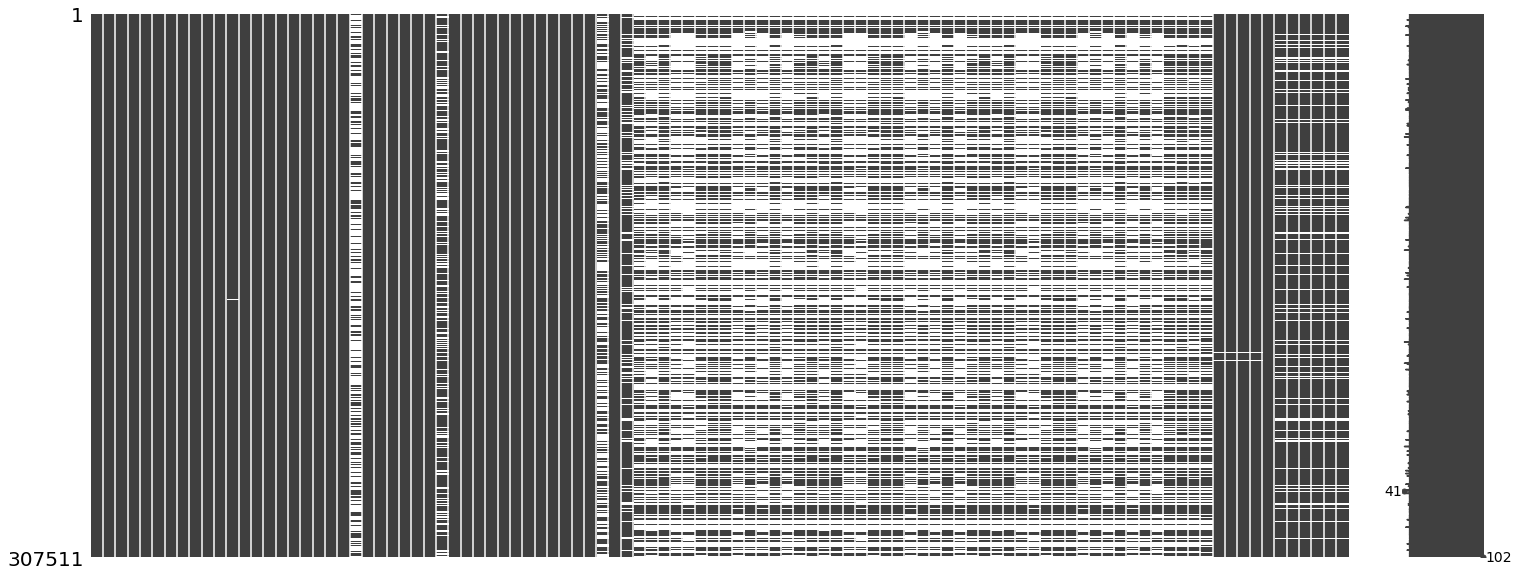

In [14]:
# 図表2：欠損の程度の可視化

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(train)

plt.show()

* 欠損値が大半を占める特徴量は解釈し難い為、削除したい。

In [15]:
# 図表３：欠損割合の確認

na_ratio = ((train.isna().sum() / len(train)) * 100).round(2)
na_dict = {"Total": na_sum, "missing_ratio": na_ratio}
na_df = pd.DataFrame.from_dict(na_dict)
na_df

,Total,missing_ratio
AMT_ANNUITY,12,0.00
AMT_CREDIT,0,0.00
AMT_GOODS_PRICE,278,0.09
AMT_INCOME_TOTAL,0,0.00
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50


* 欠損割合が50%前後の特徴量が多い。Descriptionで内容を見ると、クライアントの住居についての情報が多いのであまり削除したくないように思える。
* 一度他のアプローチからデータ量の削減を考えたい。
* 各クライアント（各データ）について、データ欠損率が高いものを削除することを考える。

### 2-2. 信頼性の低いデータ件（行）の処理

In [16]:
# 図表4：欠損が一つでもあるデータの削除

train.dropna(axis=0, how="any")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,0.270766,0.707126,0.597192,0.1464,0.1291,0.9861,0.8096,0.1080,0.04,0.0345,0.3333,0.3750,0.0000,0.1194,0.0933,0.0000,0.0000,0.1492,0.1340,0.9861,0.8171,0.1090,0.0403,0.0345,0.3333,0.3750,0.0000,0.1304,0.0972,0.0000,0.0000,0.1478,0.1291,0.9861,0.8121,0.1087,0.04,0.0345,0.3333,0.3750,0.0000,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,0,Self-employed,0.647045,0.746486,0.739412,0.0928,0.1000,0.9801,0.7280,0.0463,0.00,0.2069,0.1667,0.2083,0.0437,0.0756,0.0903,0.0000,0.0000,0.0945,0.1038,0.9801,0.7387,0.0467,0.0000,0.2069,0.1667,0.2083,0.0447,0.0826,0.0941,0.0000,0.0000,0.0937,0.1000,0.9801,0.7316,0.0466,0.00,0.2069,0.1667,0.2083,0.0445,0.0770,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,0.674832,0.616156,0.673830,0.5845,0.4570,0.9945,0.9252,0.3468,0.60,0.2414,0.9167,0.5000,0.2847,0.4287,0.7187,0.2201,0.7729,0.5956,0.4742,0.9945,0.9281,0.3500,0.6042,0.2414,0.9167,0.5000,0.2912,0.4683,0.7488,0.2218,0.8183,0.5902,0.4570,0.9945,0.9262,0.3490,0.60,0.2414,0.9167,0.5000,0.2896,0.4361,0.7317,0.2213,0.7892,reg oper account,block of flats,0.7334,Monolithic,No,0.0,0.0,0.0,0.0,-1792.0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Ma

* 試みに欠損が一つでもあるデータを削除したところ、データ件数が307511件から8602件に激減してしまった。
* サンプル数が少な過ぎると偏りが生じる危険性→流石に削除し過ぎか

In [17]:
# 図表5：欠損していない要素数が100以上のデータを保持

train.dropna(axis="rows", thresh=100, inplace=True)

In [18]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.0000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,reg oper account,block of flats,0.1417,Panel,No,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,1.0
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,Other_A,Working,Secondary / secondary special,Widow,House / apartment,0.046

* 抜けが少ないデータを57326件確保できた。
* ここからもう一度欠損の具合を見てみる。

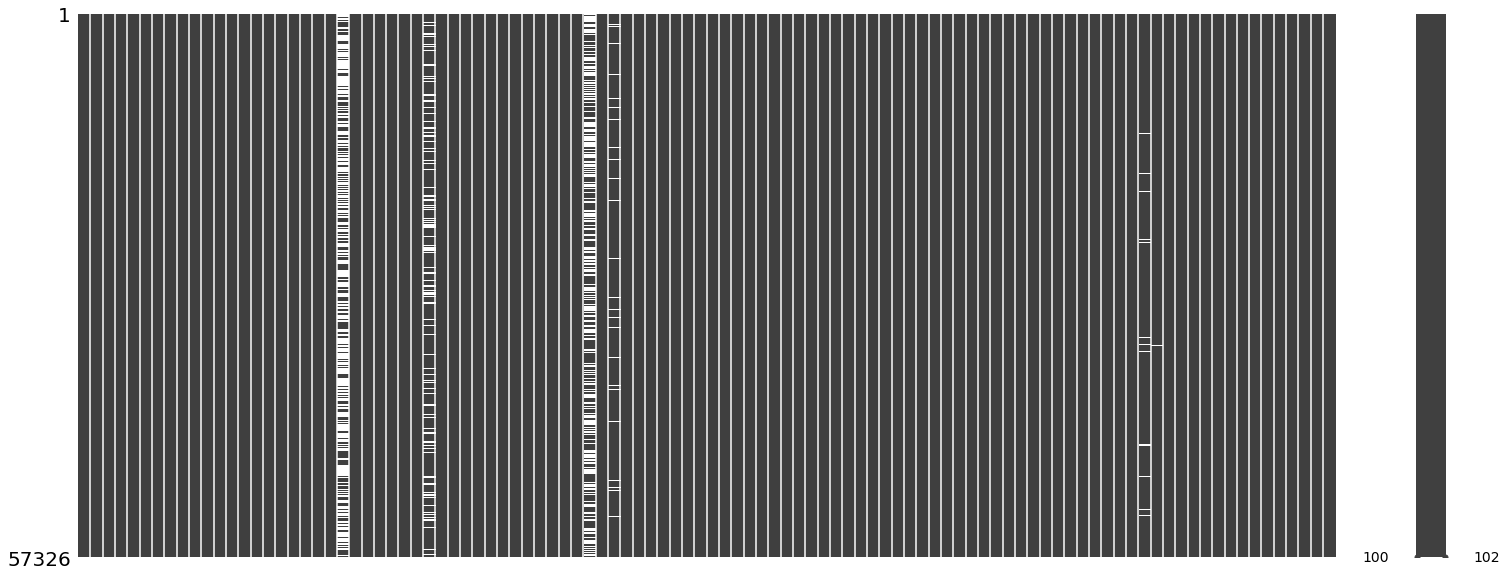

In [19]:
# 図表6：欠損の程度の可視化（データ件数削減後）

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(train)

plt.show()

* 欠損の多い特徴量が絞り込めたのが見て取れる。
* 改めて欠損割合を算出する。

### 2-3. 欠損の多い特徴量（列）の処理

In [20]:
# 図表7：欠損割合の確認（データ件数削減後）

na_sum = train.isna().sum()
na_ratio = (na_sum / len(train) * 100).round(2)
na_dict = {"Total": na_sum, "Missing_ratio": na_ratio}
na_df = pd.DataFrame.from_dict(na_dict)
na_df[na_df["Total"]!=0]

,Total,Missing_ratio
AMT_ANNUITY,1,0.00
NAME_TYPE_SUITE,139,0.24
OWN_CAR_AGE,33855,59.06
OCCUPATION_TYPE,10507,18.33
EXT_SOURCE_1,24410,42.58
EXT_SOURCE_2,37,0.06
EXT_SOURCE_3,2499,4.36
FONDKAPREMONT_MODE,1197,2.09
HOUSETYPE_MODE,29,0.05
TOTALAREA_MODE,1,0.00


* 欠損率が高い特徴量を、OWN_CAR_AGE（59.06）と OCCUPATION_TYPE（18.33）と EXT_SOURCE_1（42.58）の3つに絞り込めた。
* この3つについて、Descriptionや出力を見ながら要不要を検討。

In [21]:
# 図表８：欠損率の高い３つの特徴量の内容確認

train.loc[:, ["OWN_CAR_AGE", "OCCUPATION_TYPE", "EXT_SOURCE_1"]].head(100)

,OWN_CAR_AGE,OCCUPATION_TYPE,EXT_SOURCE_1
0,NaN,Laborers,0.083037
1,NaN,Core staff,0.311267
13,23.0,Drivers,NaN
18,NaN,Laborers,NaN
22,NaN,Sales staff,NaN
24,7.0,Drivers,NaN
25,NaN,Cleaning staff,0.561948
39,3.0,Managers,NaN
40,NaN,Laborers,NaN
55,NaN,Managers,0.552772


* OWN_CAR_AGE について、Descriptionと出力から「車を所有している年数」と捉えるのが妥当か。ただ欠損が多く、平均などで穴埋めするにしても値のバラつきが大きく、穴埋めの妥当性が疑わしいため削除。

* OCCUPATION_TYPE について、Descriptionと出力からTARGETと関わりが深そうであり、NaNは欠損というより「無職」を指す可能性があるため名称変更しPythonによる欠損地扱いから除外したい。

* EXT_SOURCE_1 について、Descriptionと出力からの内容が不明瞭なため削除。

In [22]:
# 特徴量 OWN_CAR_AGE 及び EXT_SOURCE_1 の削除

train.drop(["OWN_CAR_AGE", "EXT_SOURCE_1"], axis=1, inplace=True)

In [23]:
# 特徴量 OCCUPATION_TYPE の "NaN" を "Unemployed" に置換

train.fillna({"OCCUPATION_TYPE": "Unemployed"}, inplace=True)

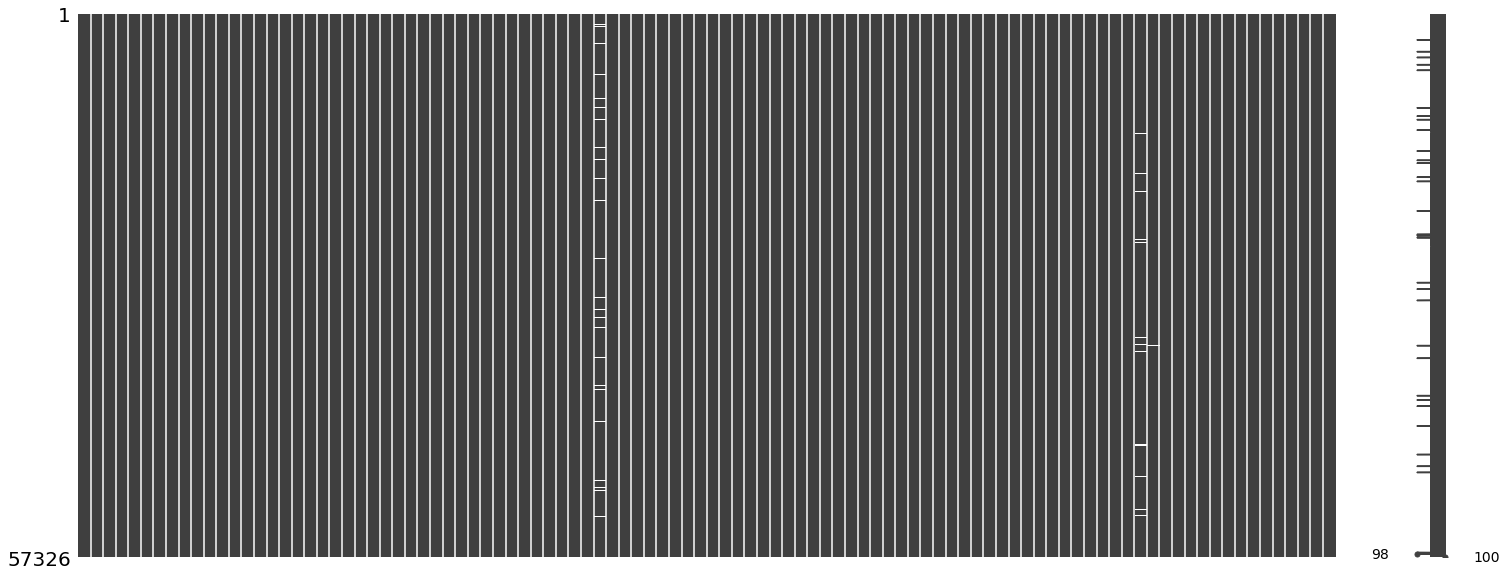

In [24]:
# 図表９： 欠損の程度の可視化（欠損の多い特徴量の処理後）

msno.matrix(train)

plt.show()

* あとは残った欠損値を埋める。

### 2-4. 残った欠損穴埋め処理

In [25]:
# 残った欠損値の確認

na_sum = train.isna().sum()
na_ratio = (na_sum / len(train) * 100).round(2)
na_dict = {"Total": na_sum, "Missing_ratio": na_ratio}
na_df = pd.DataFrame.from_dict(na_dict)
na_df[na_df["Total"]!=0]

,Total,Missing_ratio
AMT_ANNUITY,1,0.00
NAME_TYPE_SUITE,139,0.24
EXT_SOURCE_2,37,0.06
EXT_SOURCE_3,2499,4.36
FONDKAPREMONT_MODE,1197,2.09
HOUSETYPE_MODE,29,0.05
TOTALAREA_MODE,1,0.00
WALLSMATERIAL_MODE,9,0.02


In [26]:
# 残った欠損値について、Dscriptionと出力で内容確認

na_index = na_df[na_df["Total"]!=0].index
train[na_index].head(20)

,AMT_ANNUITY,NAME_TYPE_SUITE,EXT_SOURCE_2,EXT_SOURCE_3,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE
0,24700.5,Unaccompanied,0.262949,0.139376,reg oper account,block of flats,0.0149,"Stone, brick"
1,35698.5,Family,0.622246,NaN,reg oper account,block of flats,0.0714,Block
13,28966.5,Unaccompanied,0.566907,0.770087,reg oper account,block of flats,0.1417,Panel
18,7875.0,Other_A,0.706428,0.556727,reg oper account,block of flats,0.0238,"Stone, brick"
22,32521.5,Unaccompanied,0.457143,0.358951,reg oper account,block of flats,0.0696,Panel
24,12703.5,Unaccompanied,0.786179,0.565608,reg oper account,block of flats,0.0967,Panel
25,11074.5,Unaccompanied,0.651406,0.461482,reg oper account,block of flats,0.0533,"Stone, brick"
39,27000.0,Unaccompanied,0.738053,0.605836,org spec account,block of flats,0.0734,"Stone, brick"
40,35028.0,Unaccompanied,0.306841,0.320163,org spec account,block of flats,0.1463,"Stone, brick"
55,45558.0,Unaccompanied,0.616637,0.070109,reg oper spec account,block of flats,0.0857,"Stone, brick"


* 数値については平均値、文字列については最頻値で埋めるのが妥当か。

In [27]:
# 数値を平均値で欠損値埋め

train.fillna(train[["AMT_ANNUITY", "EXT_SOURCE_2", "EXT_SOURCE_3", "TOTALAREA_MODE"]].mean(), inplace=True)

In [28]:
# 文字列を最頻値で欠損埋め

train.fillna(train[["NAME_TYPE_SUITE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"]].mode(), inplace=True)

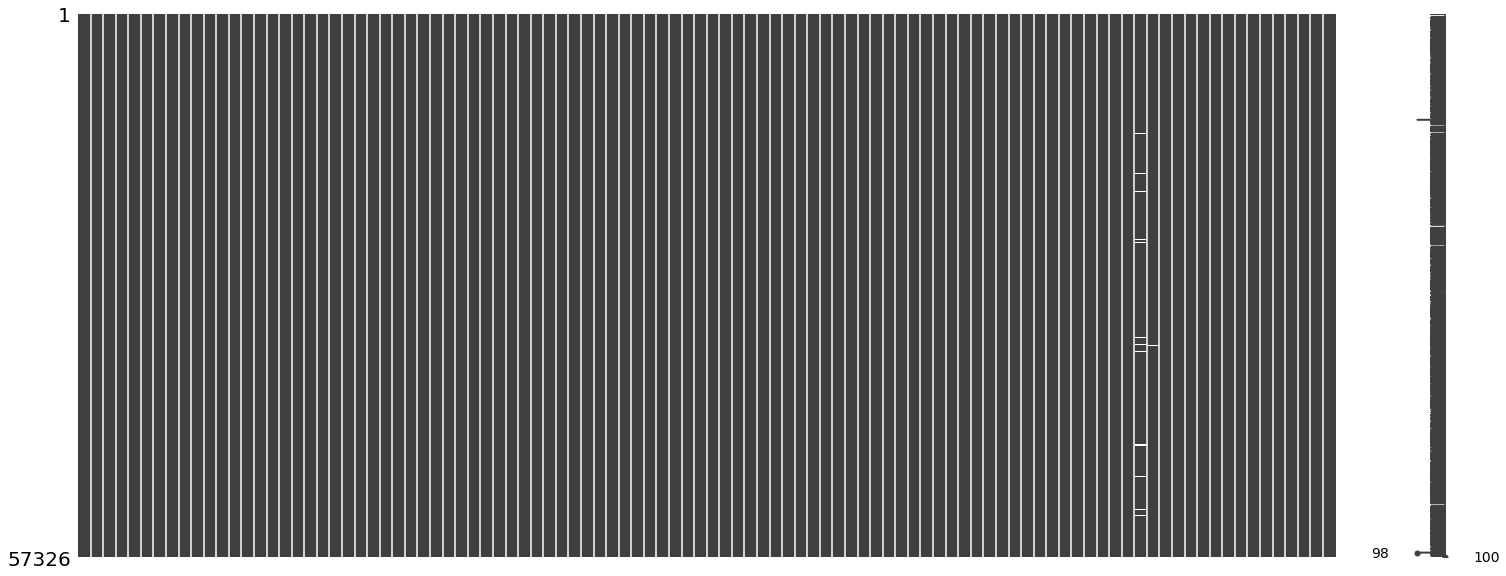

In [29]:
# 図表10 - 1： 欠損の程度の可視化（穴埋め後（失敗））

msno.matrix(train)

plt.show()

* 文字列に最頻値は適用できなかった。
* 数値データに置き換える必要性？もしくはffillかbfillの適用で済ませる？
  + そもそも欠損の割合は極小なため、ffillで十分と判断。

In [30]:
train.fillna(method = "ffill", inplace=True)

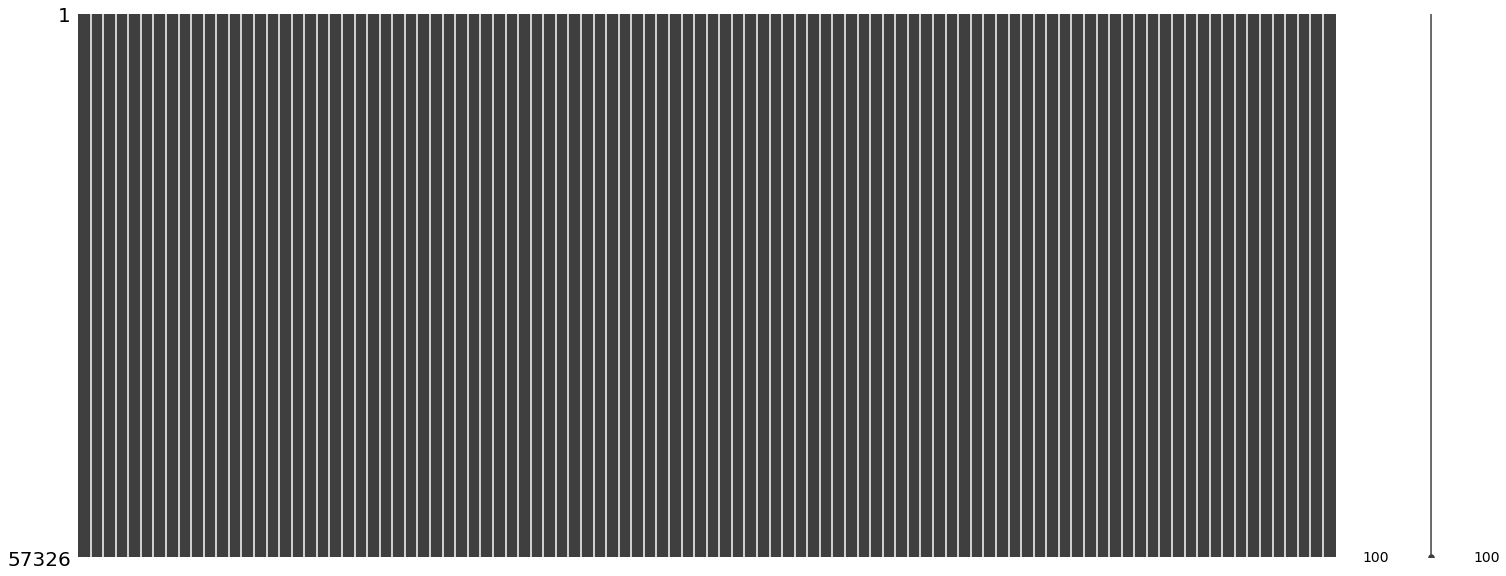

In [31]:
# 図表10 - 2： 欠損の程度の可視化（穴埋め後）

msno.matrix(train)

plt.show()

* これでひとまず全ての欠損値の処理が完了した。

## 3. 相関を探す

### 3-1. 相関係数ヒートマップによる分析

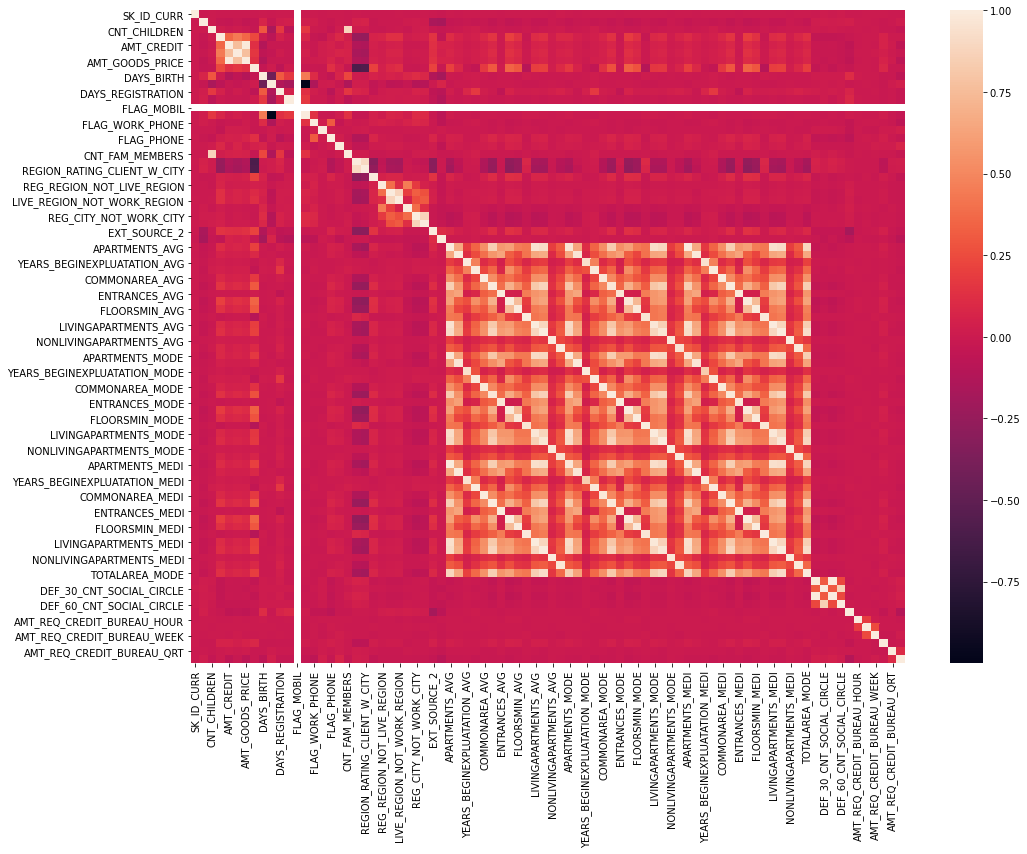

In [32]:
# 図表１１ - 1：相関係数ヒートマップ

plt.figure(figsize=(16, 12))
sns.heatmap(train.corr())

plt.show()

* このヒートマップの問題点：
  + FLAG_MOBIL（携帯電話の所持率）の、他の全ての特徴量との相関係数がNaN←おかしい
  + テキストデータが除外される
  + 一部の正規化済み特徴量群と、他の特徴量とのスケールが合わず偏った分布になっていると思われる

In [33]:
#  FLAG_MOBIL の中身確認

train.FLAG_MOBIL.value_counts()

1    57326
Name: FLAG_MOBIL, dtype: int64

* 全ての要素が１であるため、削除。

In [34]:
train.drop("FLAG_MOBIL", axis=1, inplace=True)

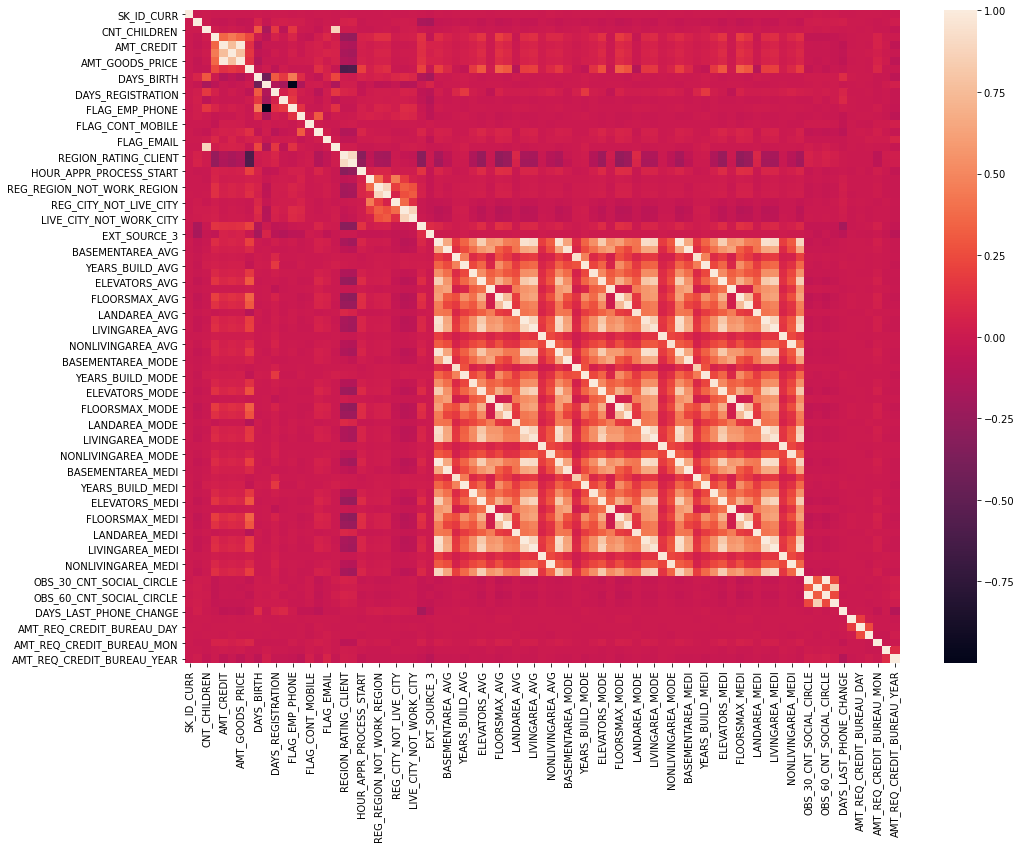

In [35]:
# 図表１１- 2：相関係数ヒートマップ（FLAG_MOBIL 削除後）

plt.figure(figsize=(16, 12))
sns.heatmap(train.corr())

plt.show()

### 3-2. TARGETとの相関の高い変数の分析

In [36]:
# TARGETとの相関係数の絶対値をとり、上位10件を表示

train.corr()["TARGET"].abs().sort_values(ascending=False).head(10)

TARGET                         1.000000
EXT_SOURCE_3                   0.165668
EXT_SOURCE_2                   0.148045
DAYS_BIRTH                     0.064857
REGION_RATING_CLIENT_W_CITY    0.056601
REGION_RATING_CLIENT           0.053719
FLOORSMAX_AVG                  0.048325
FLOORSMAX_MEDI                 0.048177
FLOORSMAX_MODE                 0.047442
AMT_GOODS_PRICE                0.042171
Name: TARGET, dtype: float64

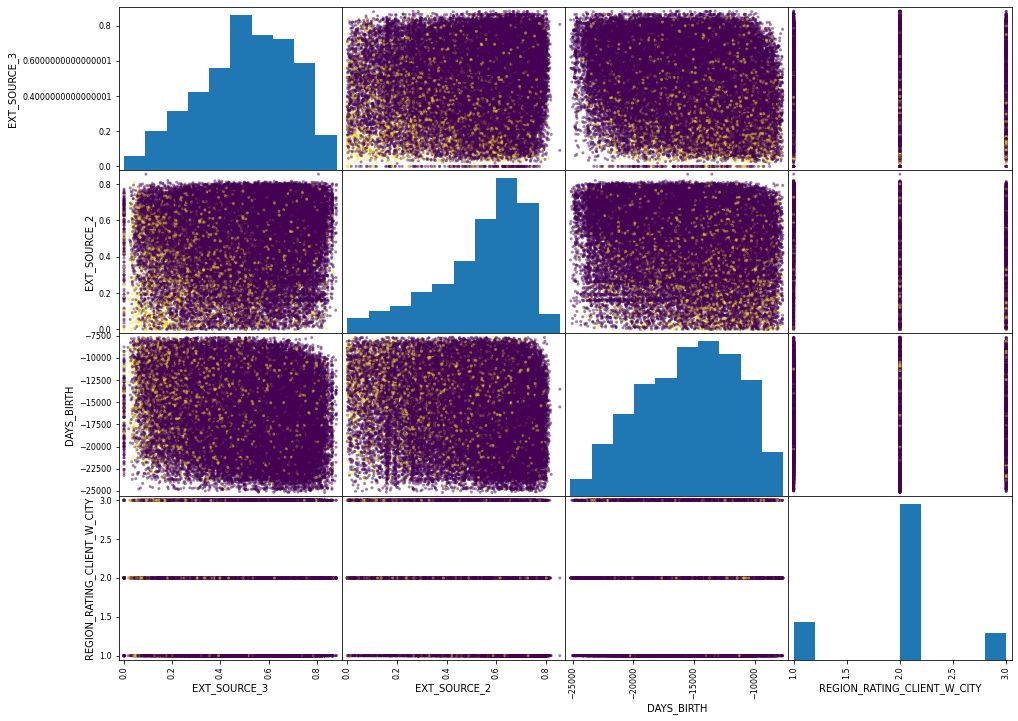

In [37]:
# 図表１２：散布図行列（TARGETとの相関の高い４件同士の比較）

from pandas.plotting import scatter_matrix
attributes = ["EXT_SOURCE_3", "EXT_SOURCE_2", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY"]

scatter_matrix(train[attributes], c=train["TARGET"], figsize=(16, 12))
plt.show()

* 上位４件同士の比較
  + REGION_RATING_CLIENT_W_CITY は居住地区の３段階評価
  + DAYS_BIRTH は申込時のクライアントの年齢（日単位）
* この図からは、各点の散らばりが大きく相関が弱いことが伺える。

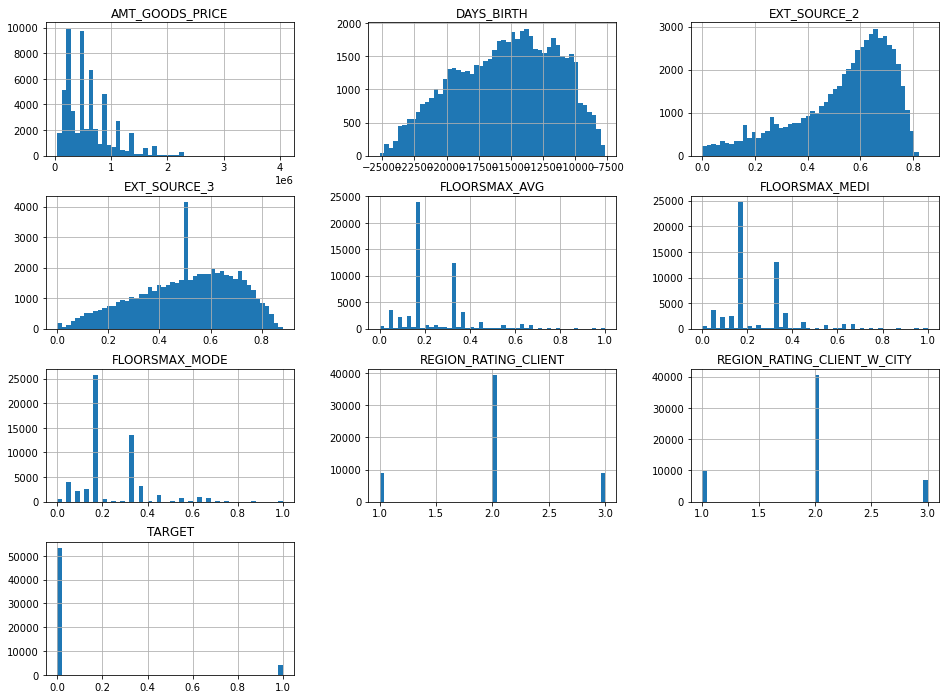

In [38]:
# 図表１３：ヒストグラム（TARGETと、TARGETとの相関の高い９件の特徴量）

corr_index = train.corr()["TARGET"].abs().sort_values(ascending=False).head(10).index

train.hist(corr_index, bins=50, figsize=(16, 12))
plt.show()

* これらの特徴量には、値のスケールが全く異なるものが含まれている。→スケーリングの必要性
* 分布の形状が非対称なものが多く、偏る方向もまちまちである。→ベル型の分布に近づけたい
* データのスケーリングの前に、テキストデータを数値に置き換えたい

### 3-3. テキストデータの処理

In [39]:
# 要素がobjectの特徴量の抽出

train_object = train.select_dtypes(include='object')
train_object

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
13,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Drivers,THURSDAY,Self-employed,reg oper account,block of flats,Panel,No
18,Revolving loans,F,N,Y,Other_A,Working,Secondary / secondary special,Widow,House / apartment,Laborers,FRIDAY,Housing,reg oper account,block of flats,"Stone, brick",No
22,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,Sales staff,THURSDAY,Self-employed,reg oper account,block of flats,Panel,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307468,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,Unemployed,THURSDAY,Industry: type 12,reg oper account,block of flats,Panel,No
307476,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Married,House / apartment,Unemployed,MONDAY,Other,not specified,block of flats,Panel,No
307478,Cash loans,F,N,Y,Family,Commercial associate,Higher education,Married,House / apartment,Core staff,THURSDAY,Self-employed,not specified,block of flats,Panel,No
307482,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Managers,THURSDAY,Telecom,not specified,block of flats,Block,No


In [40]:
# テキストデータをカテゴリカル変数に変換

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_object_encoded = ordinal_encoder.fit_transform(train_object)
train_object_encoded

array([[0., 1., 0., ..., 0., 5., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 4., 0.],
       ...,
       [0., 0., 0., ..., 0., 4., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 5., 1.]])

In [41]:
# pandasのデータフレーム型に戻す

train_object_encoded_df = pd.DataFrame(data=train_object_encoded, index=train_object.index, columns=train_object.columns)
train_object_encoded_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0,1.0,0.0,1.0,6.0,6.0,4.0,3.0,1.0,8.0,6.0,5.0,2.0,0.0,5.0,0.0
1,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,39.0,2.0,0.0,0.0,0.0
13,0.0,1.0,1.0,0.0,6.0,6.0,4.0,1.0,1.0,4.0,4.0,42.0,2.0,0.0,4.0,0.0
18,1.0,0.0,0.0,1.0,3.0,6.0,4.0,4.0,1.0,8.0,0.0,13.0,2.0,0.0,5.0,0.0
22,0.0,0.0,0.0,0.0,6.0,6.0,4.0,1.0,4.0,14.0,4.0,42.0,2.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307468,0.0,0.0,0.0,1.0,6.0,6.0,1.0,0.0,1.0,17.0,4.0,17.0,2.0,0.0,4.0,0.0
307476,0.0,0.0,0.0,0.0,6.0,6.0,1.0,1.0,1.0,17.0,1.0,33.0,0.0,0.0,4.0,0.0
307478,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,42.0,0.0,0.0,4.0,0.0
307482,0.0,0.0,1.0,1.0,6.0,1.0,4.0,1.0,1.0,10.0,4.0,44.0,0.0,0.0,0.0,0.0


In [42]:
# 図表１４：
# 元のデータに上書きして更新

train.update(train_object_encoded_df)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,6,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,2,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.505634,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,2,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,0,1,1,0,1,225000.0,918468.0,28966.5,697500.0,6,6,4,1,1,0.016612,-14086,-3028,-643.0,-4911,1,0,1,0,0,4,3.0,2,2,4,13,0,0,0,0,0,0,42,0.566907,0.770087,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.0000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,2,0,0.1417,4,0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,1.0
18,100022,0,1,0,0,1,0,112500.0,157500.0,7875.0,157500.0,3,6,4,4,1,0.046220,-17718,-7804,-8751.0,-1259,1,0,1,1,0,8,1.0,1,1,0,13,0,0,0,0,0,0,13,0.706428,0.556727,0.0278,0.0617,0.9881,0.8368,0.0018,0.00,0.1034,0.0833,0.1250,0.0279,0.0227,0.0290,0.0000,0.0000,0.0284,0.0640,0.9881,0.8432,0.0018,0.0000,0.1034,0.0833,0.1250,0.0286,0.0248,0.0302,0.0000,0.0000,0.0281,0.0617,0.9881,0.8390,0.0018,0.00,0.1034,0.0833,0.1250,0.0284,0.0231,0.0295,0.0000,0.0000,2,0,0.0238,5,0,8.0,0.0,8.0,0.0,-239.0,0.0,0.0,0.0,0.0,0.0,0.0
22,100026,0,0,0,0,0,1,450000.0,497520.0,32521.5,450000.0,6,6,4,1,4,0.020713,-11146,-4306,-114.0,-2518,1,0,1,0,0,14,3.0,3,

* 全ての要素が数値化されたことが確認できる。

### 3-4. スケーリング

In [43]:
# 全体に対数変換をかける

import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
train_array = transformer.transform(train)
train_array

/Users/teruitakahiro/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:171: RuntimeWarning: divide by zero encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
/Users/teruitakahiro/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_function_transformer.py:171: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


array([[11.51295546,  0.69314718,  0.        , ...,  0.        ,
         0.        ,  0.69314718],
       [11.51296546,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [11.51310545,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.69314718],
       ...,
       [13.03072824,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.09861229],
       [13.03074577,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.69314718],
       [13.03076111,  0.69314718,  0.        , ...,  0.        ,
         0.69314718,  1.09861229]])

In [44]:
# 図表１５：対数変換後

normed_train = pd.DataFrame(data=train_array, index=train.index, columns=train.columns)
normed_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,11.512955,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,12.218500,12.915581,10.114619,12.768544,1.945910,1.945910,1.609438,1.386294,0.693147,0.018626,NaN,NaN,NaN,NaN,0.693147,0.0,0.693147,0.693147,0.0,2.197225,0.693147,1.098612,1.098612,1.945910,2.397895,0.0,0.0,0.0,0.0,0.0,0.0,1.791759,0.233449,0.130481,0.024400,0.036235,0.679150,0.481932,0.014199,0.000000,0.066724,0.080012,0.117783,0.036235,0.019999,0.018822,0.000000,0.000000,0.024888,0.037585,0.679150,0.491092,0.014297,0.000000,0.066724,0.080012,0.117783,0.037007,0.021761,0.019607,0.000000,0.000000,0.024693,0.036235,0.679150,0.485077,0.014297,0.000000,0.066724,0.080012,0.117783,0.036814,0.020293,0.019116,0.000000,0.000000,1.098612,0.0,0.014790,1.791759,0.000000,1.098612,1.098612,1.098612,1.098612,NaN,0.0,0.0,0.000000,0.0,0.000000,0.693147
1,11.512965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.506181,14.072865,10.482892,13.937287,0.693147,1.386294,0.693147,0.693147,0.693147,0.003535,NaN,NaN,NaN,NaN,0.693147,0.0,0.693147,0.693147,0.0,1.386294,1.098612,0.693147,0.693147,0.693147,2.484907,0.0,0.0,0.0,0.0,0.0,0.0,3.688879,0.483811,0.409214,0.091576,0.051548,0.685669,0.585562,0.058740,0.076961,0.033918,0.255959,0.287657,0.012916,0.074458,0.053446,0.003892,0.009752,0.088377,0.052403,0.685669,0.590006,0.048504,0.077516,0.033918,0.255959,0.287657,0.012719,0.076035,0.053920,0.000000,0.000000,0.092397,0.051548,0.685669,0.587064,0.059023,0.076961,0.033918,0.255959,0.287657,0.013114,0.075757,0.054299,0.003892,0.009950,1.098612,0.0,0.068966,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,NaN,0.0,0.0,0.000000,0.0,0.000000,0.000000
13,11.513105,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,12.323860,13.730463,10.273930,13.455259,1.945910,1.945910,1.609438,0.693147,0.693147,0.016476,NaN,NaN,NaN,NaN,0.693147,0.0,0.693147,0.000000,0.0,1.609438,1.386294,1.098612,1.098612,1.609438,2.639057,0.0,0.0,0.0,0.0,0.0,0.0,3.761200,0.449103,0.571029,0.137499,0.092853,0.683400,0.550892,0.056569,0.148420,0.129184,0.287657,0.318454,0.089018,0.113507,0.130765,0.000000,0.000000,0.139936,0.096219,0.683400,0.556869,0.057042,0.149368,0.129184,0.287657,0.318454,0.090937,0.12336

In [45]:
# 元データとの比較

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,6,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,2,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.505634,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,2,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
13,100017,0,0,1,1,0,1,225000.0,918468.0,28966.5,697500.0,6,6,4,1,1,0.016612,-14086,-3028,-643.0,-4911,1,0,1,0,0,4,3.0,2,2,4,13,0,0,0,0,0,0,42,0.566907,0.770087,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.0000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,2,0,0.1417,4,0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,1.0
18,100022,0,1,0,0,1,0,112500.0,157500.0,7875.0,157500.0,3,6,4,4,1,0.046220,-17718,-7804,-8751.0,-1259,1,0,1,1,0,8,1.0,1,1,0,13,0,0,0,0,0,0,13,0.706428,0.556727,0.0278,0.0617,0.9881,0.8368,0.0018,0.00,0.1034,0.0833,0.1250,0.0279,0.0227,0.0290,0.0000,0.0000,0.0284,0.0640,0.9881,0.8432,0.0018,0.0000,0.1034,0.0833,0.1250,0.0286,0.0248,0.0302,0.0000,0.0000,0.0281,0.0617,0.9881,0.8390,0.0018,0.00,0.1034,0.0833,0.1250,0.0284,0.0231,0.0295,0.0000,0.0000,2,0,0.0238,5,0,8.0,0.0,8.0,0.0,-239.0,0.0,0.0,0.0,0.0,0.0,0.0
22,100026,0,0,0,0,0,1,450000.0,497520.0,32521.5,450000.0,6,6,4,1,4,0.020713,-11146,-4306,-114.0,-2518,1,0,1,0,0,14,3.0,3,

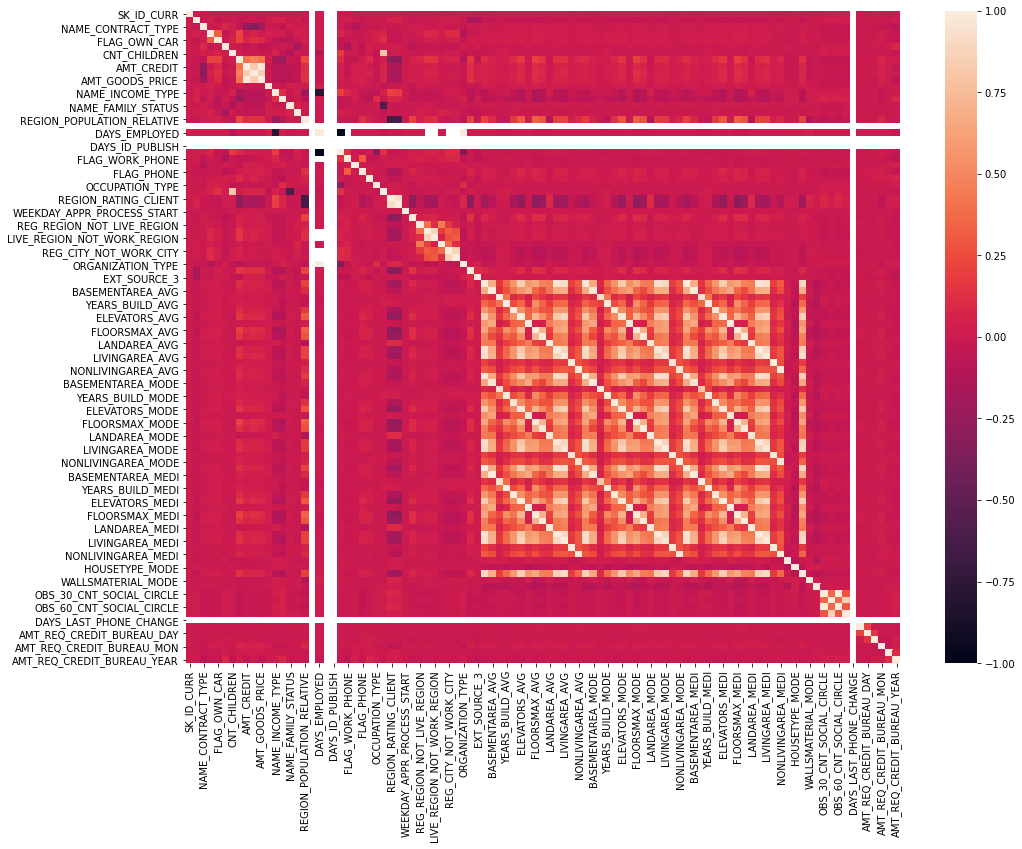

In [46]:
# 図表１６：対数変換後のヒートマップ

plt.figure(figsize=(16, 12))
sns.heatmap(normed_train.corr())

plt.show()

* 今後の課題：
  + 負値に対数変換をかけてしまったために、値が消失した特徴量がある
    - 全体に定数を足して負値を無くせば、対数変換可能か
    - 正負を反転しても意味合いが変わらなければ、絶対値をかけても良いだろうか
  + ヒートマップの分布自体にあまり変化が見られない  
    - そもそもこれらの特徴量に対するスケーリング手法は、対数変換が適正かどうか